In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:
alpha = 0.8
f = 3.07
beta = 8
omega = 0.8

In [ ]:
def system(t, xyz, omega):
    x, y, z = xyz
    dxdt = y
    dydt = - alpha * y - beta * np.exp(-x) * (1 - np.exp(-x)) + f * np.cos(z)
    dzdt = omega
    return [dxdt, dydt, dzdt]

In [ ]:
t_span_short = (0, 125)
t_eval_short = np.arange(0, 125.1, 0.1)
initial_conditions = [0, 0, 0]
solution_short = solve_ivp(system, t_span_short, initial_conditions, t_eval=t_eval_short, args = (omega, ))
final_point = solution_short.y[:, -1]
print(final_point)

[  1.8681839    1.00324048 100.        ]


<ipython-input-3-e4172dc5a663>:4: RuntimeWarning: overflow encountered in exp
  dydt = - alpha * y - beta * np.exp(-x) * (1 - np.exp(-x)) + f * np.cos(z)


<ipython-input-22-e4172dc5a663>:4: RuntimeWarning: overflow encountered in exp
  dydt = - alpha * y - beta * np.exp(-x) * (1 - np.exp(-x)) + f * np.cos(z)
<ipython-input-22-e4172dc5a663>:4: RuntimeWarning: overflow encountered in scalar multiply
  dydt = - alpha * y - beta * np.exp(-x) * (1 - np.exp(-x)) + f * np.cos(z)
<ipython-input-22-e4172dc5a663>:4: RuntimeWarning: invalid value encountered in scalar subtract
  dydt = - alpha * y - beta * np.exp(-x) * (1 - np.exp(-x)) + f * np.cos(z)


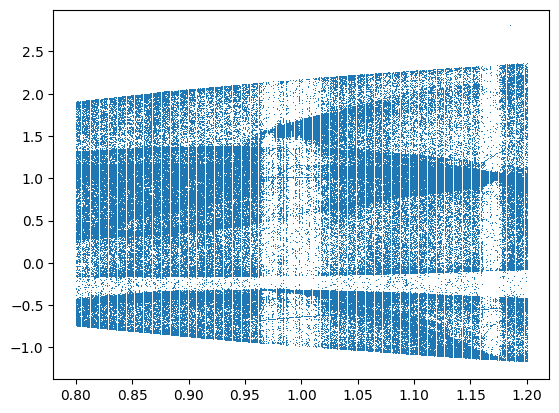

In [ ]:
final_point = solution_short.y[:, -1]
X = []
Y = []
for omega in np.arange(0.8, 1.201, 0.001):

    t_span_long = (0, 1001 * np.pi / omega)
    t_eval_long = np.arange(0, 1001 * np.pi / omega, 2 * np.pi / omega)

    solution_long = solve_ivp(system, t_span_long, final_point, t_eval=t_eval_long, args = (omega,))
    X += 501 * [omega]
    Y.append(solution_long.y[1])

Y = np.ravel(Y)
plt.plot(X, Y, ls='', marker=',')
plt.show()

In [ ]:
def system_with_variations(t, xyz, omega):
    x, y, z = xyz[0], xyz[1], xyz[2]
    x1, y1, z1 = xyz[3], xyz[4], xyz[5]
    x2, y2, z2 = xyz[6], xyz[7], xyz[8]
    x3, y3, z3 = xyz[9], xyz[10], xyz[11]
    dxdt = y
    dydt = - alpha * y - beta * np.exp(-x) * (1 - np.exp(-x)) + f * np.cos(z)
    dzdt = omega
    dx1dt = y1
    dy1dt = - alpha * y1 - beta * np.exp(-x) * (- 1 + 2 * np.exp(-x)) * x1 - f * np.sin(z) * z1
    dz1dt = 0
    dx2dt = y2
    dy2dt = - alpha * y2 - beta * np.exp(-x) * (- 1 + 2 * np.exp(-x)) * x2 - f * np.sin(z) * z2
    dz2dt = 0
    dx3dt = y3
    dy3dt = - alpha * y3 - beta * np.exp(-x) * (- 1 + 2 * np.exp(-x)) * x3 - f * np.sin(z) * z3
    dz3dt = 0
    return [dxdt, dydt, dzdt, dx1dt, dy1dt, dz1dt, dx2dt, dy2dt, dz2dt, dx3dt, dy3dt, dz3dt]

In [ ]:
def gram_schmidt(vectors):

    u1 = vectors[0:3]
    u2 = vectors[3:6] - np.dot(vectors[3:6], u1) / np.dot(u1, u1) * u1
    u3 = vectors[6:9] - np.dot(vectors[6:9], u1) / np.dot(u1, u1) * u1
    u3 = u3 - np.dot(vectors[6:9], u2) / np.dot(u2, u2) * u2
    return np.hstack([u1, u2, u3])

def norm(vectors):
    u1 = vectors[0:3]
    u2 = vectors[3:6]
    u3 = vectors[6:9]

    u1 = u1 / (u1[0]**2 + u1[1]**2 + u1[2]**2)**0.5
    u2 = u2 / (u2[0]**2 + u2[1]**2 + u2[2]**2)**0.5
    u3 = u3 / (u3[0]**2 + u3[1]**2 + u3[2]**2)**0.5

    return np.hstack([u1, u2, u3])

In [ ]:
M = 10000
omega = 0.8
arr = np.array([1, 0, 0, 0, 1, 0, 0, 0, 1])
initial_point = np.hstack([final_point, arr])
S1, S2, S3 = [], [], []

t_span_long = (0, 1)
t_eval_long = np.arange(0, 1.001, 0.001)

for i in range(M):
    solution_long = solve_ivp(system_with_variations, t_span_long, initial_point, t_eval=t_eval_long, args = (omega, ))

    vector = solution_long.y[3:12, -1]
    vector = gram_schmidt(vector)

    S1 += [np.log((vector[0]**2 + vector[1]**2 + vector[2]**2 + 1e-10)**0.5)]
    S2 += [np.log((vector[3]**2 + vector[4]**2 + vector[5]**2 + 1e-10)**0.5)]
    S3 += [np.log((vector[6]**2 + vector[7]**2 + vector[8]**2 + 1e-10)**0.5)]

    vector = norm(vector)

    initial_point = np.hstack([solution_long.y[:3, -1], vector])


In [ ]:
lambda1 = sum(S1) / M
lambda2 = sum(S2) / M
lambda3 = sum(S3) / M
print(lambda1, lambda2, lambda3)

D = 1 + (lambda1 + lambda3) / abs(lambda2)
print(D)

0.052760033537624054 -0.8528029398594122 5.0000004135759846e-11
1.0618666178570184


<ipython-input-3-e4172dc5a663>:4: RuntimeWarning: overflow encountered in exp
  dydt = - alpha * y - beta * np.exp(-x) * (1 - np.exp(-x)) + f * np.cos(z)
<ipython-input-3-e4172dc5a663>:4: RuntimeWarning: overflow encountered in scalar multiply
  dydt = - alpha * y - beta * np.exp(-x) * (1 - np.exp(-x)) + f * np.cos(z)


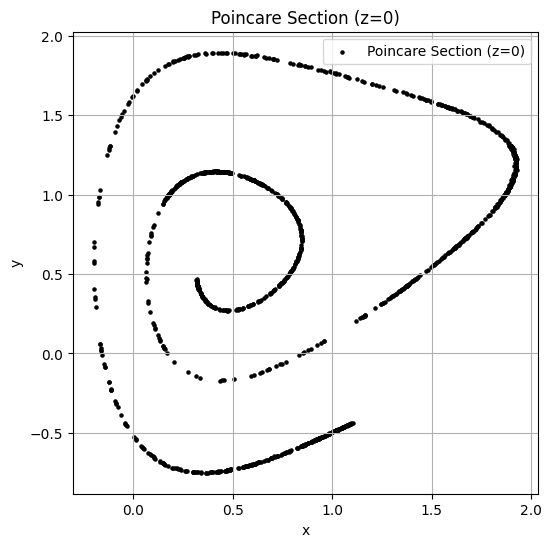

In [ ]:
final_point = solution_short.y[:, -1]
omega = 0.8

t_span_long = (0, 10000)
t_eval_long = np.arange(0, 10000.001, 2 * np.pi / omega)

solution_long = solve_ivp(system, t_span_long, final_point, t_eval=t_eval_long, args = (omega, ))

x_crossings_z0 = solution_long.y[0]
y_crossings_z0 = solution_long.y[1]

plt.figure(figsize=(6, 6))
plt.scatter(x_crossings_z0, y_crossings_z0, color='black', s=5, label='Poincare Section (z=0)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Poincare Section (z=0)')
plt.legend()
plt.grid(True)
plt.show()

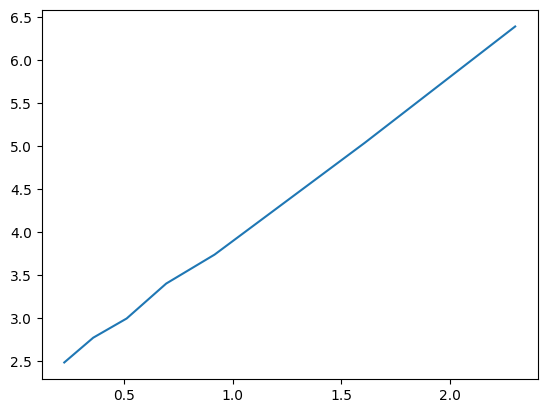

In [ ]:
def box_counting_dimension(data, box_size):
    min_x = np.min(data[0, :])
    min_y = np.min(data[1, :])
    max_x = np.max(data[0, :])
    max_y = np.max(data[1, :])

    num_boxes_x = int(np.ceil((max_x - min_x) / box_size))
    num_boxes_y = int(np.ceil((max_y - min_y) / box_size))

    covered_boxes = np.zeros((num_boxes_x, num_boxes_y))

    for point0 in data[0]:
      for point1 in data[1]:
        x_index = int((point0 - min_x) / box_size)
        y_index = int((point1 - min_y) / box_size)
        covered_boxes[x_index, y_index] = 1

    num_covered_boxes = np.sum(covered_boxes)

    return np.log(num_covered_boxes)

data = np.vstack([x_crossings_z0, y_crossings_z0])

box_size = np.arange(0.1, 0.9, 0.1)
dimension = []

for i in box_size:
    dimension += [box_counting_dimension(data, i)]

plt.plot(np.log(1 / box_size), dimension)
plt.show()